In [1]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/airline_passengers.csv", index_col="Month")
df.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


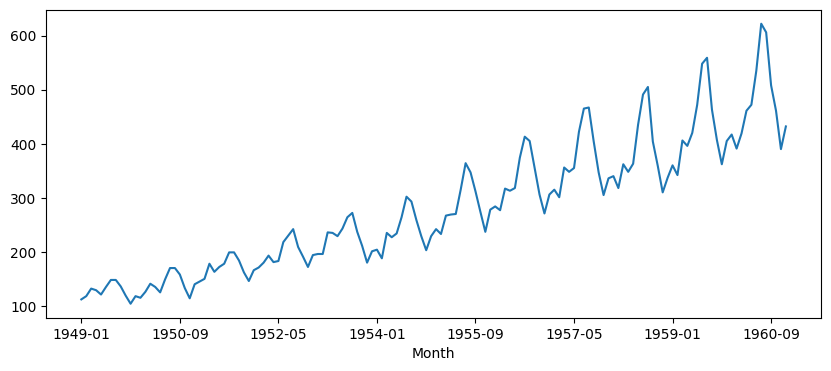

In [3]:
df["Passengers"].plot(figsize=(10,4));

In [4]:
len(df)

144

In [6]:
data, lam = boxcox(df["Passengers"])
df["Passengers_box_cox"] = data

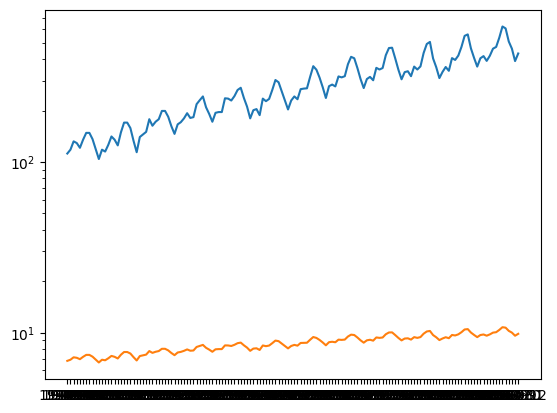

In [7]:
plt.semilogy(df)

<Axes: xlabel='Month'>

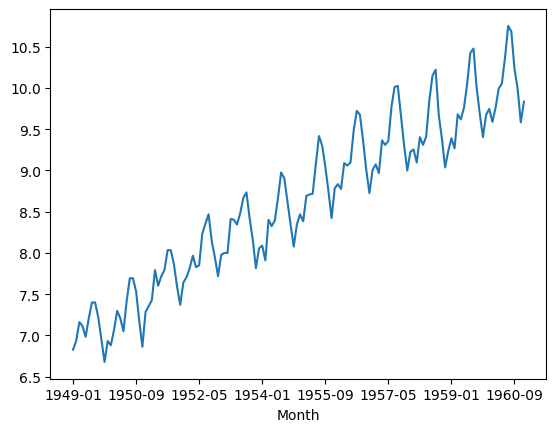

In [8]:
df["Passengers_box_cox"].plot()

# Price Simulation  

In [22]:
# number of time steps
T = 1000

# initial price 
P0=10 

# drift 
mu = 0.001

In [23]:
# last log price
last_p = np.log(P0)

log_returns = np.zeros(T)
prices = np.zeros(T)
for t in range(T):
    # sample a log return
    r = 0.01 * np.random.randn()

    # compute the new log price
    p = last_p + mu + r

    # store the return and price 
    log_returns[t] = r + mu
    prices[t] = np.exp(p)

    # assign last_p 
    last_p = p 

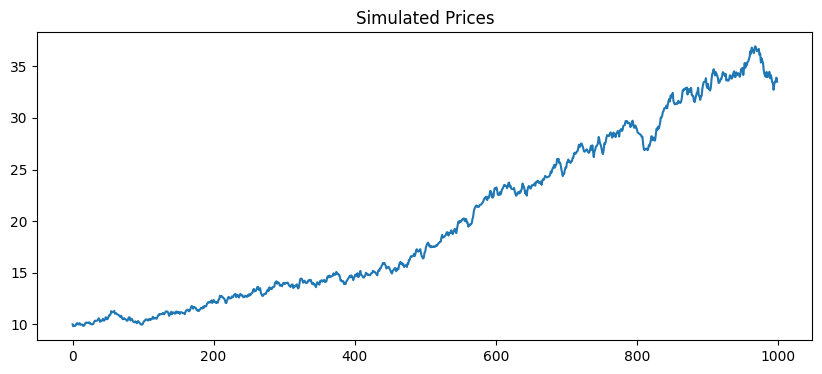

In [24]:
plt.figure(figsize=(10,4))
plt.plot(prices)
plt.title("Simulated Prices");

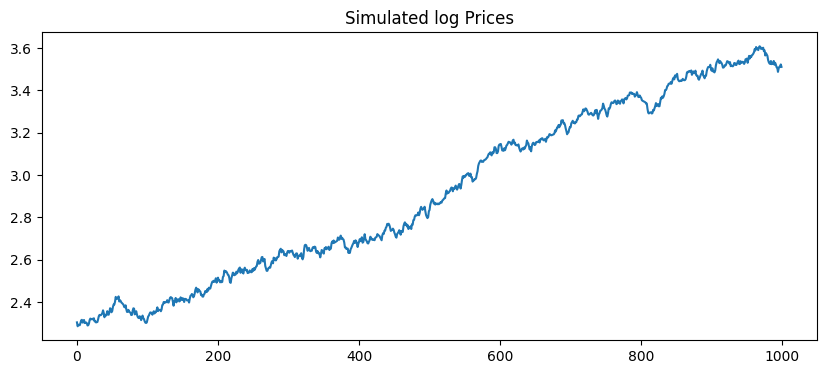

In [27]:
plt.figure(figsize=(10,4))
plt.plot(np.log(prices))
plt.title("Simulated log Prices");

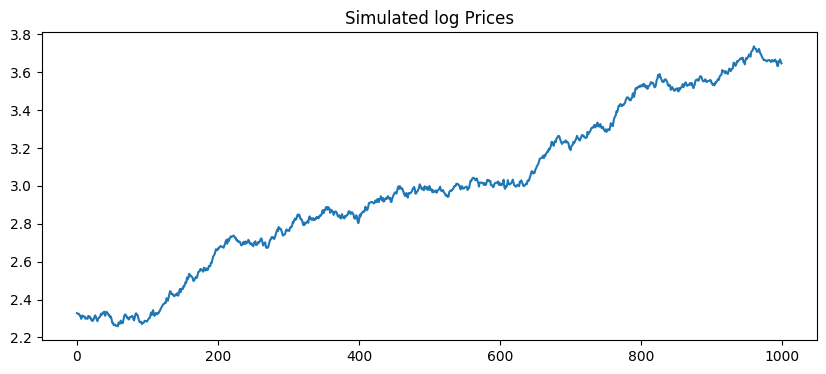

In [31]:
# vectorized version 
p_v = mu + 0.01 * np.random.randn(T)
p_v[0] += np.log(P0)
p_v = np.cumsum(p_v)
prices_v = np.exp(p_v)

plt.figure(figsize=(10,4))
plt.plot(p_v)
plt.title("Simulated log Prices");